# The purpose is to show the SED of stars

## Definitions of the libraries

In [23]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [25]:
import pandas as pd
import os
import re

In [26]:
from astroquery.simbad import Simbad

In [27]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [28]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [29]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [30]:
dir_star='calspec'
dir_nostar='grid'

In [31]:
dir_submodels=['ags','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic','k93models','pickles','bkmodels','ck04models','gunnstryker','kc96']

## where are the files

In [32]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_star)

In [33]:
filelist=os.listdir(SEDfile_dir) 

In [34]:
fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

## Find the star-names in the files

In [35]:
star_header = []
star_file_calspec = []
for filename in filelist:
    index=0
    if re.search('fits',filename) and re.search('hd',filename) and re.search('stis',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        star_header.append(hdr)
        star_file_calspec.append(filename)

In [36]:
star_names = []
index=0
for hdr in star_header: 
#    print index
    if index!=433:
        star_name=star_header[index]['TARGETID']
        star_names.append(star_name)
        index+=1
    else:
        print '>>>>>> skip file # ',index, 'BAD HEADER'
        print '>>>>>> filename = ', filelist[index]
        print hdr
        index+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81


In [37]:
print star_names

['HD159222', 'HD180609', 'HD93521', 'HD163466', 'HD116405', 'HD009051', 'HD38949', 'HD205905', 'HD106252', 'HD111980', 'HD160617', 'HD185975', 'HD106252', 'HD009051', 'HD205905', 'HD116405', 'HD163466', 'HD158485', 'HD200654', 'HD180609', 'HD159222', 'HD38949', 'HD106252', 'HD074000', 'HD031128', 'HD180609', 'HD209458', 'HD158485', 'HD163466', 'HD60753', 'HD116405', 'HD37725', 'HD158485', 'HD209458', 'HD159222', 'HD165459', 'HD14943', 'HD074000', 'HD37962', 'HD205905', 'HD38949', 'HD165459', 'HD14943', 'HD031128', 'HD37962', 'HD60753', 'HD37725', 'HD158485', 'HD209458', 'HD209458', 'HD93521', 'HD60753', 'HD37725', 'HD38949', 'HD37962', 'HD074000', 'HD031128', 'HD14943', 'HD165459', 'HD116405', 'HD37725', 'HD93521', 'HD200654', 'HD209458', 'HD159222', 'HD160617', 'HD185975', 'HD165459', 'HD14943', 'HD111980', 'HD37962', 'HD205905', 'HD009051', 'HD106252', 'HD111980', 'HD185975', 'HD160617', 'HD180609', 'HD200654', 'HD209458', 'HD93521', 'HD163466']


## Sort the star names

In [38]:
star_names_sorted=sorted(star_names,key=star_names.count,reverse=True) 

## Make every star name in upper case

In [39]:
star_names_sorted_upper = map(lambda s: s.upper(), star_names_sorted)

## Remove multiple entries

In [40]:
star_names_set=set(star_names_sorted_upper)

## Make a dictionary of filenames

In [41]:
StarDict= {}
for star in star_names_set:
    print star,': \n'
    star_set_of_file= []
    tag_upper='^'+star.upper()+'*'
    tag_lower='^'+star.lower()+'*'
    for thefile in fits_files:
        if re.search(tag_upper,thefile) or re.search(tag_lower,thefile):         
            star_set_of_file.append(thefile)
    #StarDict[star]=sorted(star_set_of_file,key=star_names.count,reverse=True)
    StarDict[star]=sorted(star_set_of_file,key=star_names.count)
    print StarDict[star] ,'\n'
    
            
    

HD205905 : 

['hd205905_stis_003.fits', 'hd205905_stis_002.fits', 'hd205905_mod_002.fits', 'hd205905_stis_004.fits', 'hd205905_mod_001.fits', 'hd205905_stis_001.fits'] 

HD14943 : 

['hd14943_mod_001.fits', 'hd14943_stis_001.fits', 'hd14943_stis_002.fits', 'hd14943_stis_003.fits', 'hd14943_mod_002.fits', 'hd14943_stis_004.fits'] 

HD37725 : 

['hd37725_mod_002.fits', 'hd37725_stis_001.fits', 'hd37725_stis_002.fits', 'hd37725_mod_001.fits', 'hd37725_stis_003.fits', 'hd37725_stis_004.fits'] 

HD160617 : 

['hd160617_stis_001.fits', 'hd160617_stis_003.fits', 'hd160617_stis_002.fits'] 

HD159222 : 

['hd159222_stis_003.fits', 'hd159222_stis_002.fits', 'hd159222_mod_002.fits', 'hd159222_stis_004.fits', 'hd159222_mod_001.fits', 'hd159222_stis_001.fits'] 

HD031128 : 

['hd031128_stis_001.fits', 'hd031128_stis_003.fits', 'hd031128_stis_002.fits'] 

HD209458 : 

['hd209458_mod_002.fits', 'hd209458_stisnic_007.fits', 'hd209458_stisnic_006.fits', 'hd209458_stisnic_005.fits', 'hd209458_stisnic_00

## Plot the SED

Warning, 6 of 3739 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 3739 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 3739 bins contained negative fluxes; they have been set to zero.
Warning, 53 of 4684 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 7208 bins contained negative fluxes; they have been set to zero.
Warning, 44 of 4685 bins contained negative fluxes; they have been set to zero.
Warning, 17 of 3740 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 6265 bins contained negative fluxes; they have been set to zero.
Warning, 19 of 3740 bins contained negative fluxes; they have been set to zero.


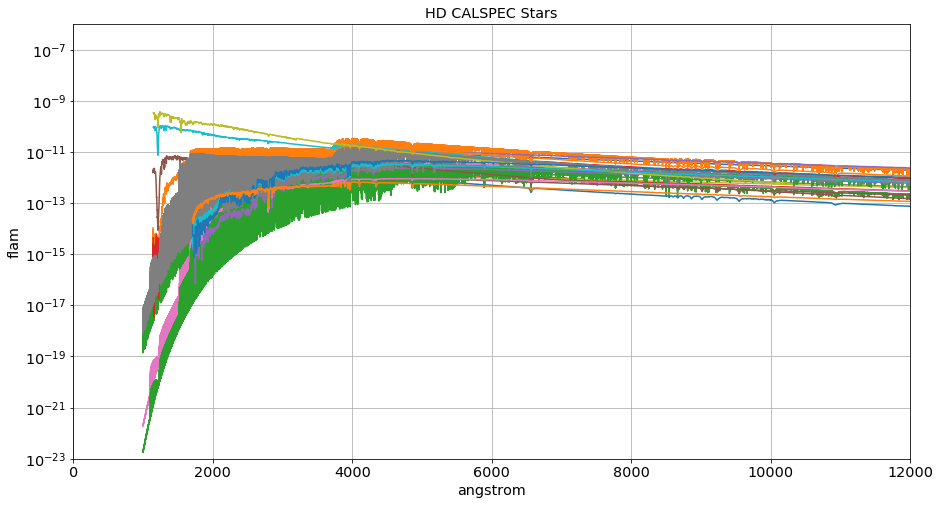

In [42]:
for keystar in StarDict:
    the_files=StarDict[keystar]
    if(len(the_files))>0 and keystar != 'SUN_REFERENCE':
        #print sorted(the_files,reverse=True)
        
        selected_file=the_files[0]
        selected_fullfile=os.path.join(SEDfile_dir,selected_file)
        
        sed=S.FileSpectrum(selected_fullfile)
        
        plt.semilogy(sed.wave,sed.flux,label=keystar)
        plt.xlim(0, 12000)
        plt.ylim(1e-23, 1e-6)
        plt.xlabel(sed.waveunits)
        plt.ylabel(sed.fluxunits)
        plt.grid(True)
 #       plt.legend(loc='best')
#    plt.title(os.path.basename(S.Vega.name))
    plt.title("HD CALSPEC Stars")
    plt.savefig("calspec_hd.png")